In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv("titanic_train.csv")

In [13]:
#train.shape

In [6]:
#train.head()

In [12]:
#train.info()

In [11]:
#train.isna().sum()

In [10]:
#train.isnull().sum()

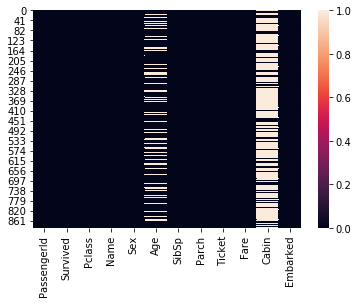

In [15]:
sns.heatmap(train.isnull(), cbar=True)

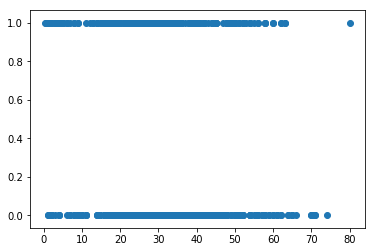

In [16]:
plt.scatter("Age","Survived",data=train)

In [17]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

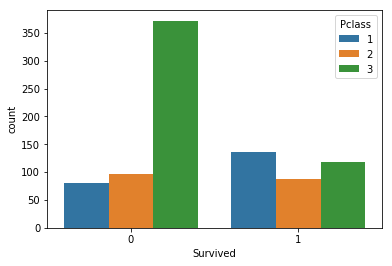

In [20]:
sns.countplot(x="Survived",hue="Pclass", data=train)

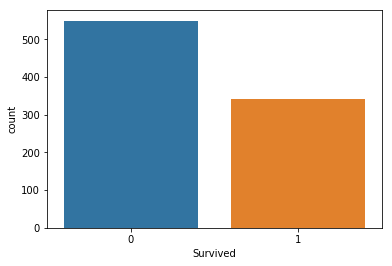

In [21]:
sns.countplot(x="Survived",data=train)

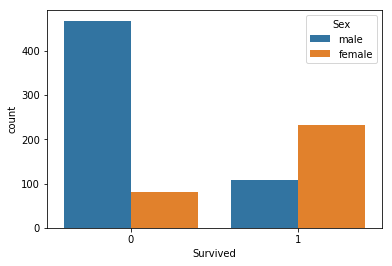

In [22]:
sns.countplot(x="Survived",hue="Sex",data=train)

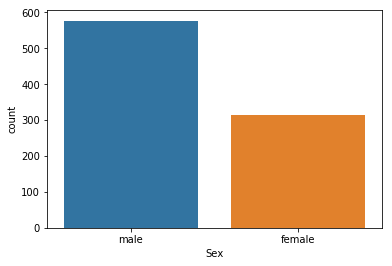

In [23]:
sns.countplot(x="Sex",data=train)

In [ ]:
240/300

In [ ]:
230/410

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


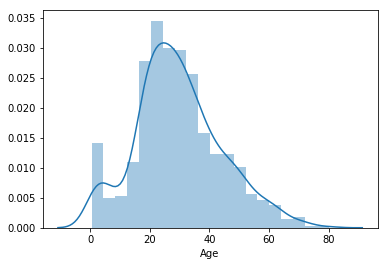

In [24]:
sns.distplot(train["Age"].dropna())

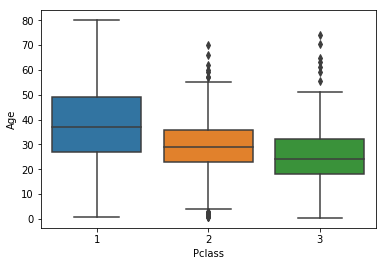

In [25]:
sns.boxplot(x="Pclass", y = "Age", data=train)

In [26]:
def missing(column):
    Age = column[0]
    Pclass = column[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age
    
    

In [27]:
train["Age"] = train[["Age","Pclass"]].apply(missing, axis=1)

In [29]:
train['Age'].isnull().sum()

0

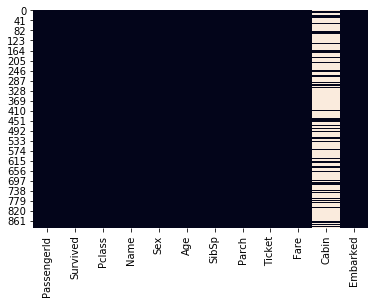

In [30]:
sns.heatmap(train.isnull(), cbar=False)

In [31]:
train.drop("Cabin", axis=1,inplace=True)

In [37]:
#train.head(10)

In [39]:
#train.info()

In [40]:
sex = pd.get_dummies(train["Sex"], drop_first=True)

In [42]:
#sex

In [44]:
train['Embarked'].nunique()

3

In [45]:
embark = pd.get_dummies(train["Embarked"], drop_first=True)

In [47]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [48]:
#embark

In [49]:
train = pd.concat([train,sex,embark], axis=1)

In [51]:
#train.head()

In [52]:
train.drop(["Sex","Embarked", "Name","Ticket","PassengerId"],axis=1,inplace=True)

In [53]:
x = train[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S']]

In [54]:
y = train['Survived']

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=88)

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
model = LogisticRegression()

In [59]:
model.fit(x_train,y_train)

C:\Users\Deepstrats\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [60]:
model.coef_

array([[-0.8439766 , -0.02720841, -0.18823924, -0.14407243,  0.00413709,
        -2.36341479, -0.18022039, -0.38158196]])

In [ ]:
x.columns

In [61]:
model.intercept_

array([4.02947301])

In [62]:
predictions = model.predict(x_test)

In [63]:
predictions

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1], dtype=int64)

In [65]:
#y_test.head(15)

In [66]:
from sklearn.metrics import confusion_matrix

In [67]:
Accuracy_matrix = confusion_matrix(y_test,predictions)

In [68]:
Accuracy_matrix

array([[97, 20],
       [15, 47]], dtype=int64)

In [71]:
y_test.shape


(179,)

In [72]:
(97+47)/(179)

0.8044692737430168

In [73]:
from sklearn.metrics import classification_report

In [74]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       117
           1       0.70      0.76      0.73        62

   micro avg       0.80      0.80      0.80       179
   macro avg       0.78      0.79      0.79       179
weighted avg       0.81      0.80      0.81       179



In [ ]:
47/(47+15)

In [ ]:
47/(20+47)

In [75]:
import statsmodels.api as sm

In [76]:
logit_model = sm.Logit(y_train,x_train)

In [77]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.507233
         Iterations 6


In [78]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      704
Method:                           MLE   Df Model:                            7
Date:                Wed, 15 May 2019   Pseudo R-squ.:                  0.2431
Time:                        16:27:55   Log-Likelihood:                -361.15
converged:                       True   LL-Null:                       -477.17
                                        LLR p-value:                 1.829e-46
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass         0.0649      0.096      0.673      0.501      -0.124       0.254
Age            0.0068      0.006      1.068      0.286      -0.006       0.019
SibSp         -0.2022      0.101     -1.996      0.046      -0.401      -0.004
Parch         -0.2072      0.123     -1.685      0.092      -0.448       0.034
Fare           0.0186      0.004      5.273      0.000       0.012       0.025
male          -2.2203      0.202    -10.998      0.000      -2.616      -1.825
Q              0.0981      0.398      0.247      0.805      -0.681       0.877
S              0.1067      0.247      0.432      0.666      -0.378       0.591
==============================================================================
"""

In [ ]:
x_train.columns

In [79]:
x_new = x_train.drop(['Pclass','Q','S','SibSp', 'Parch'],axis=1)

In [80]:
logit_model1 = sm.Logit(y_train,x_new)

In [81]:
result2 = logit_model1.fit()

Optimization terminated successfully.
         Current function value: 0.514067
         Iterations 6


In [90]:
result2.fittedvalues.head(5)

593    0.378908
198    0.378908
176   -1.490642
385   -0.910920
302   -1.904066
dtype: float64

In [91]:
y_train.head(5)

593    0
198    1
176    0
385    0
302    0
Name: Survived, dtype: int64

In [82]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      709
Method:                           MLE   Df Model:                            2
Date:                Wed, 15 May 2019   Pseudo R-squ.:                  0.2329
Time:                        16:29:00   Log-Likelihood:                -366.02
converged:                       True   LL-Null:                       -477.17
                                        LLR p-value:                 5.321e-49
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age            0.0109      0.005      2.327      0.020       0.002       0.020
Fare           0.0137      0.003      4.951      0.000       0.008       0.019
male          -2.1116      0.177    -11.918      0.000      -2.459      -1.764
==============================================================================
"""

In [83]:
x_test_new = x_test.drop(['Pclass','Q','S','SibSp', 'Parch'],axis=1)

In [84]:
predictions = result2.predict(x_test_new)

In [ ]:
x_test.columns

In [ ]:
predictions.head()

In [ ]:
y_test.head()

In [94]:
Accuracy_matrix_Stats = confusion_matrix(y_test,predictions>0.50)

In [95]:
Accuracy_matrix_Stats

array([[100,  17],
       [ 18,  44]], dtype=int64)

In [87]:
(100+44)/(144+17+18)

0.8044692737430168

In [96]:
#predictions